# 7.4 Reinforcement Learning - Human Models

Module - Reinforcement Learning

For book, references and training materials, please check this project website [http://activefitness.ai/ai-in-sports-with-python](http://activefitness.ai/ai-in-sports-with-python).

Reference: Chapter 10, [Applied Machine Learning for Health and Fitness](https://www.apress.com/us/book/9781484257715)

In [2]:
import gym
import pybullet as p
import pybullet_data as pd 

p.connect(p.DIRECT)
p.resetSimulation()
p.setAdditionalSearchPath(pd.getDataPath())
human = p.loadURDF("humanoid/humanoid.urdf")
p.getNumBodies()
for i in range (p.getNumJoints(human)):
    jointInfo=p.getJointInfo(human,i)
    print("joint",jointInfo[0],"name=",jointInfo[1].decode('ascii'))

joint 0 name= root
joint 1 name= chest
joint 2 name= neck
joint 3 name= right_shoulder
joint 4 name= right_elbow
joint 5 name= right_wrist
joint 6 name= left_shoulder
joint 7 name= left_elbow
joint 8 name= left_wrist
joint 9 name= right_hip
joint 10 name= right_knee
joint 11 name= right_ankle
joint 12 name= left_hip
joint 13 name= left_knee
joint 14 name= left_ankle


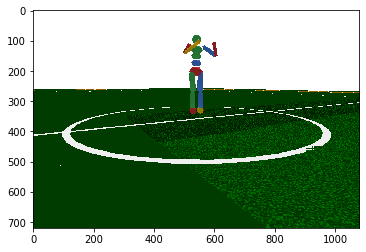

In [3]:
import pybullet as p
import pybullet_data as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from utils.gym.gymbullet import get_camera_image
%matplotlib inline

p.connect(p.DIRECT)
p.resetSimulation()
p.setAdditionalSearchPath(pd.getDataPath()) 
p.setGravity(0,0,-9.8)
p.loadSDF("stadium.sdf")
p.loadMJCF("mjcf/humanoid_fixed.xml")

img = get_camera_image()
plt.imshow(img[2])
plt.draw()
plt.show()
p.disconnect()

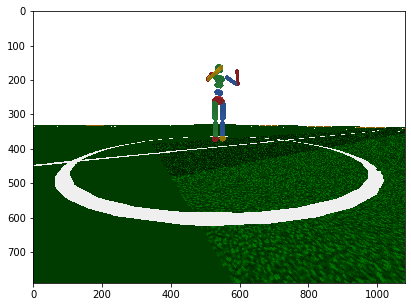

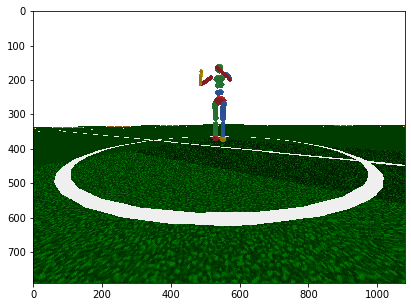

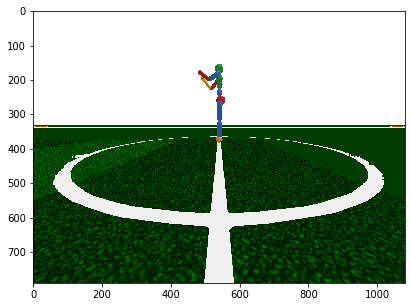

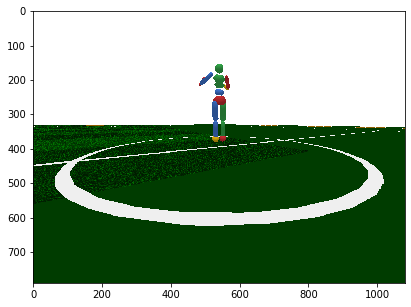

In [2]:
import pybullet as p
import pybullet_data as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from utils.gym.gymbullet import plot_humanoid
%matplotlib inline

p.connect(p.DIRECT)
p.setAdditionalSearchPath(pd.getDataPath())
p.resetSimulation()

plane = p.loadSDF("stadium.sdf")
human = p.loadMJCF("mjcf/humanoid_fixed.xml")

plot_humanoid()

Creating animated png, please wait about 5 seconds


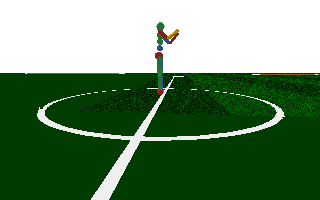

In [1]:
from utils.gym.gymbullet import animated_humanoid
import pybullet as p
import pybullet_data as pd
import matplotlib.pyplot as plt
from matplotlib import pylab
from IPython.display import Image
%matplotlib inline

p.connect(p.DIRECT)
p.setAdditionalSearchPath(pd.getDataPath())
p.resetSimulation()

plane = p.loadSDF("stadium.sdf")
human = p.loadMJCF("mjcf/humanoid_fixed.xml")

ANIMATION = "data/testing/humanoid.png"
animated_humanoid(ANIMATION)
Image(filename=ANIMATION)

In [2]:
import gym
from utils.gym import gymplot
from utils.gym import gymbullet

env,agent = gymbullet.load_humanoid()
print(f'actions: {env.action_space}')
print(f'observations: {env.observation_space}')

WalkerBase::__init__
actions: Box(17,)
observations: Box(44,)


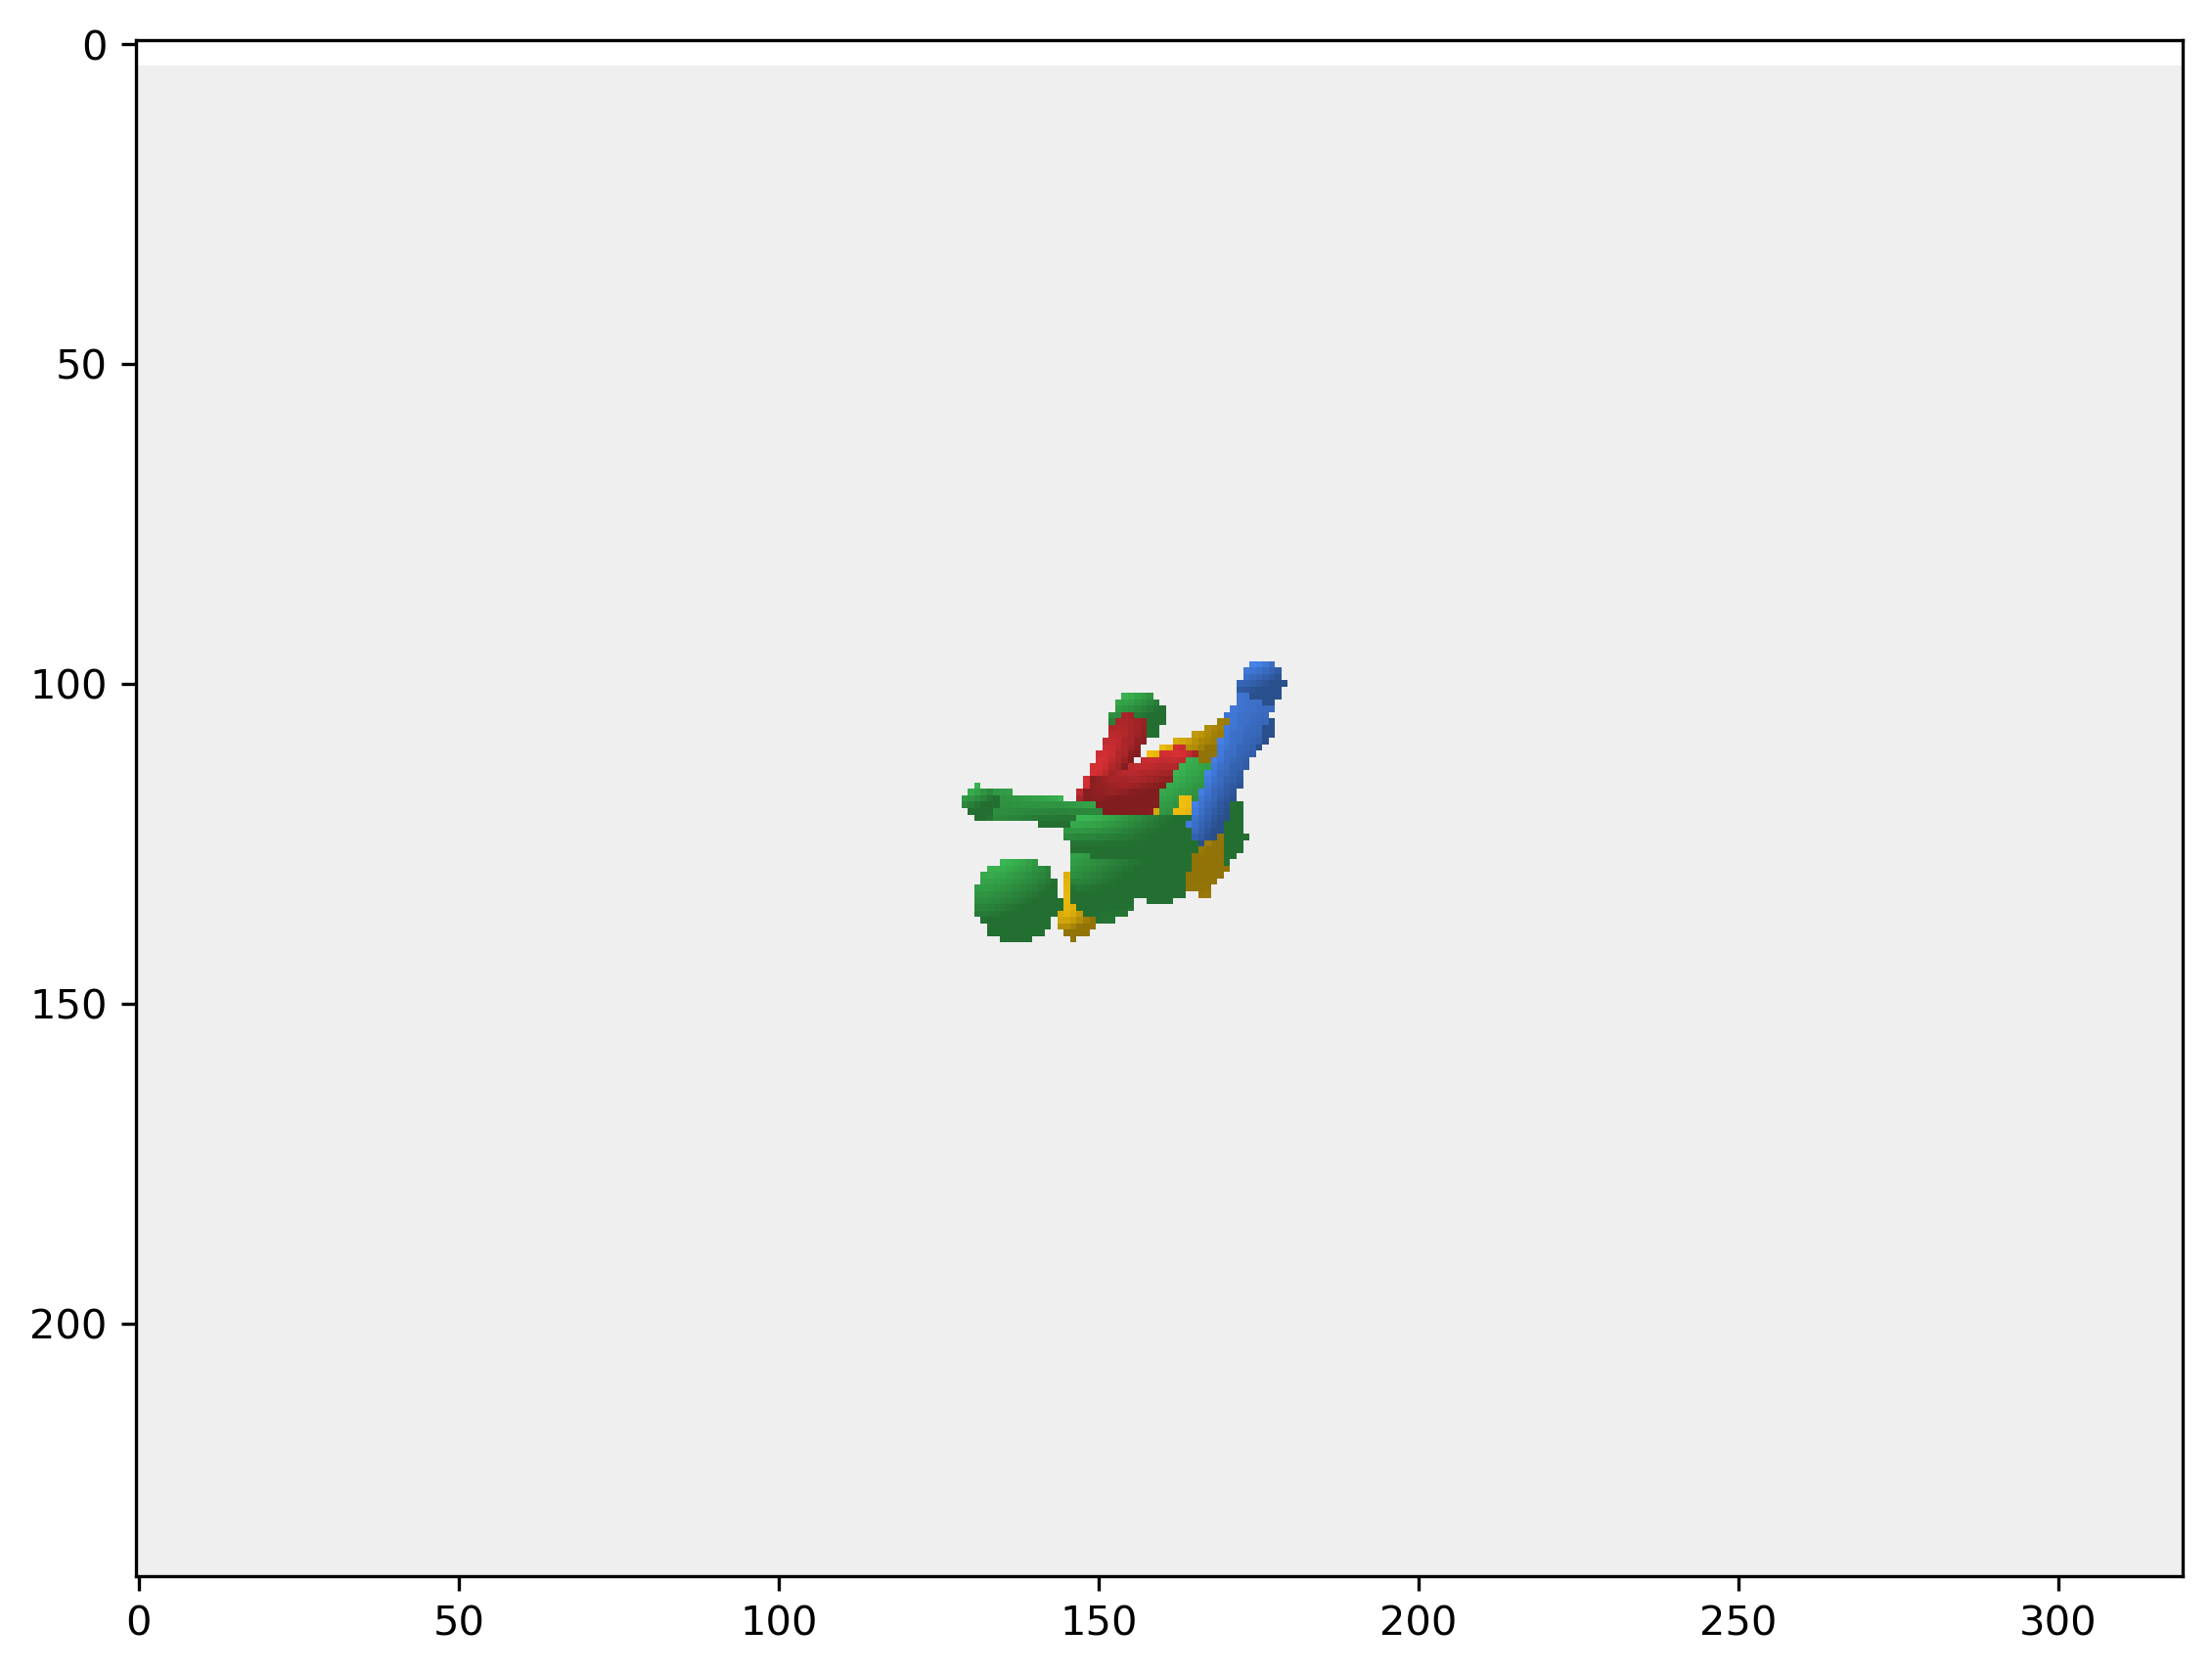

In [3]:
# IMPORTANT: You may need to restart the kernel to run this script
import gym
from utils.gym import gymplot
from utils.gym import gymbullet

env,agent = gymbullet.load_humanoid(trained=False)
env.reset()
img = gymplot.plot_init(env)
for _ in range(100):
    gymplot.plot_next(img, env)
    action = env.action_space.sample()
    env.step(action)
env.close()

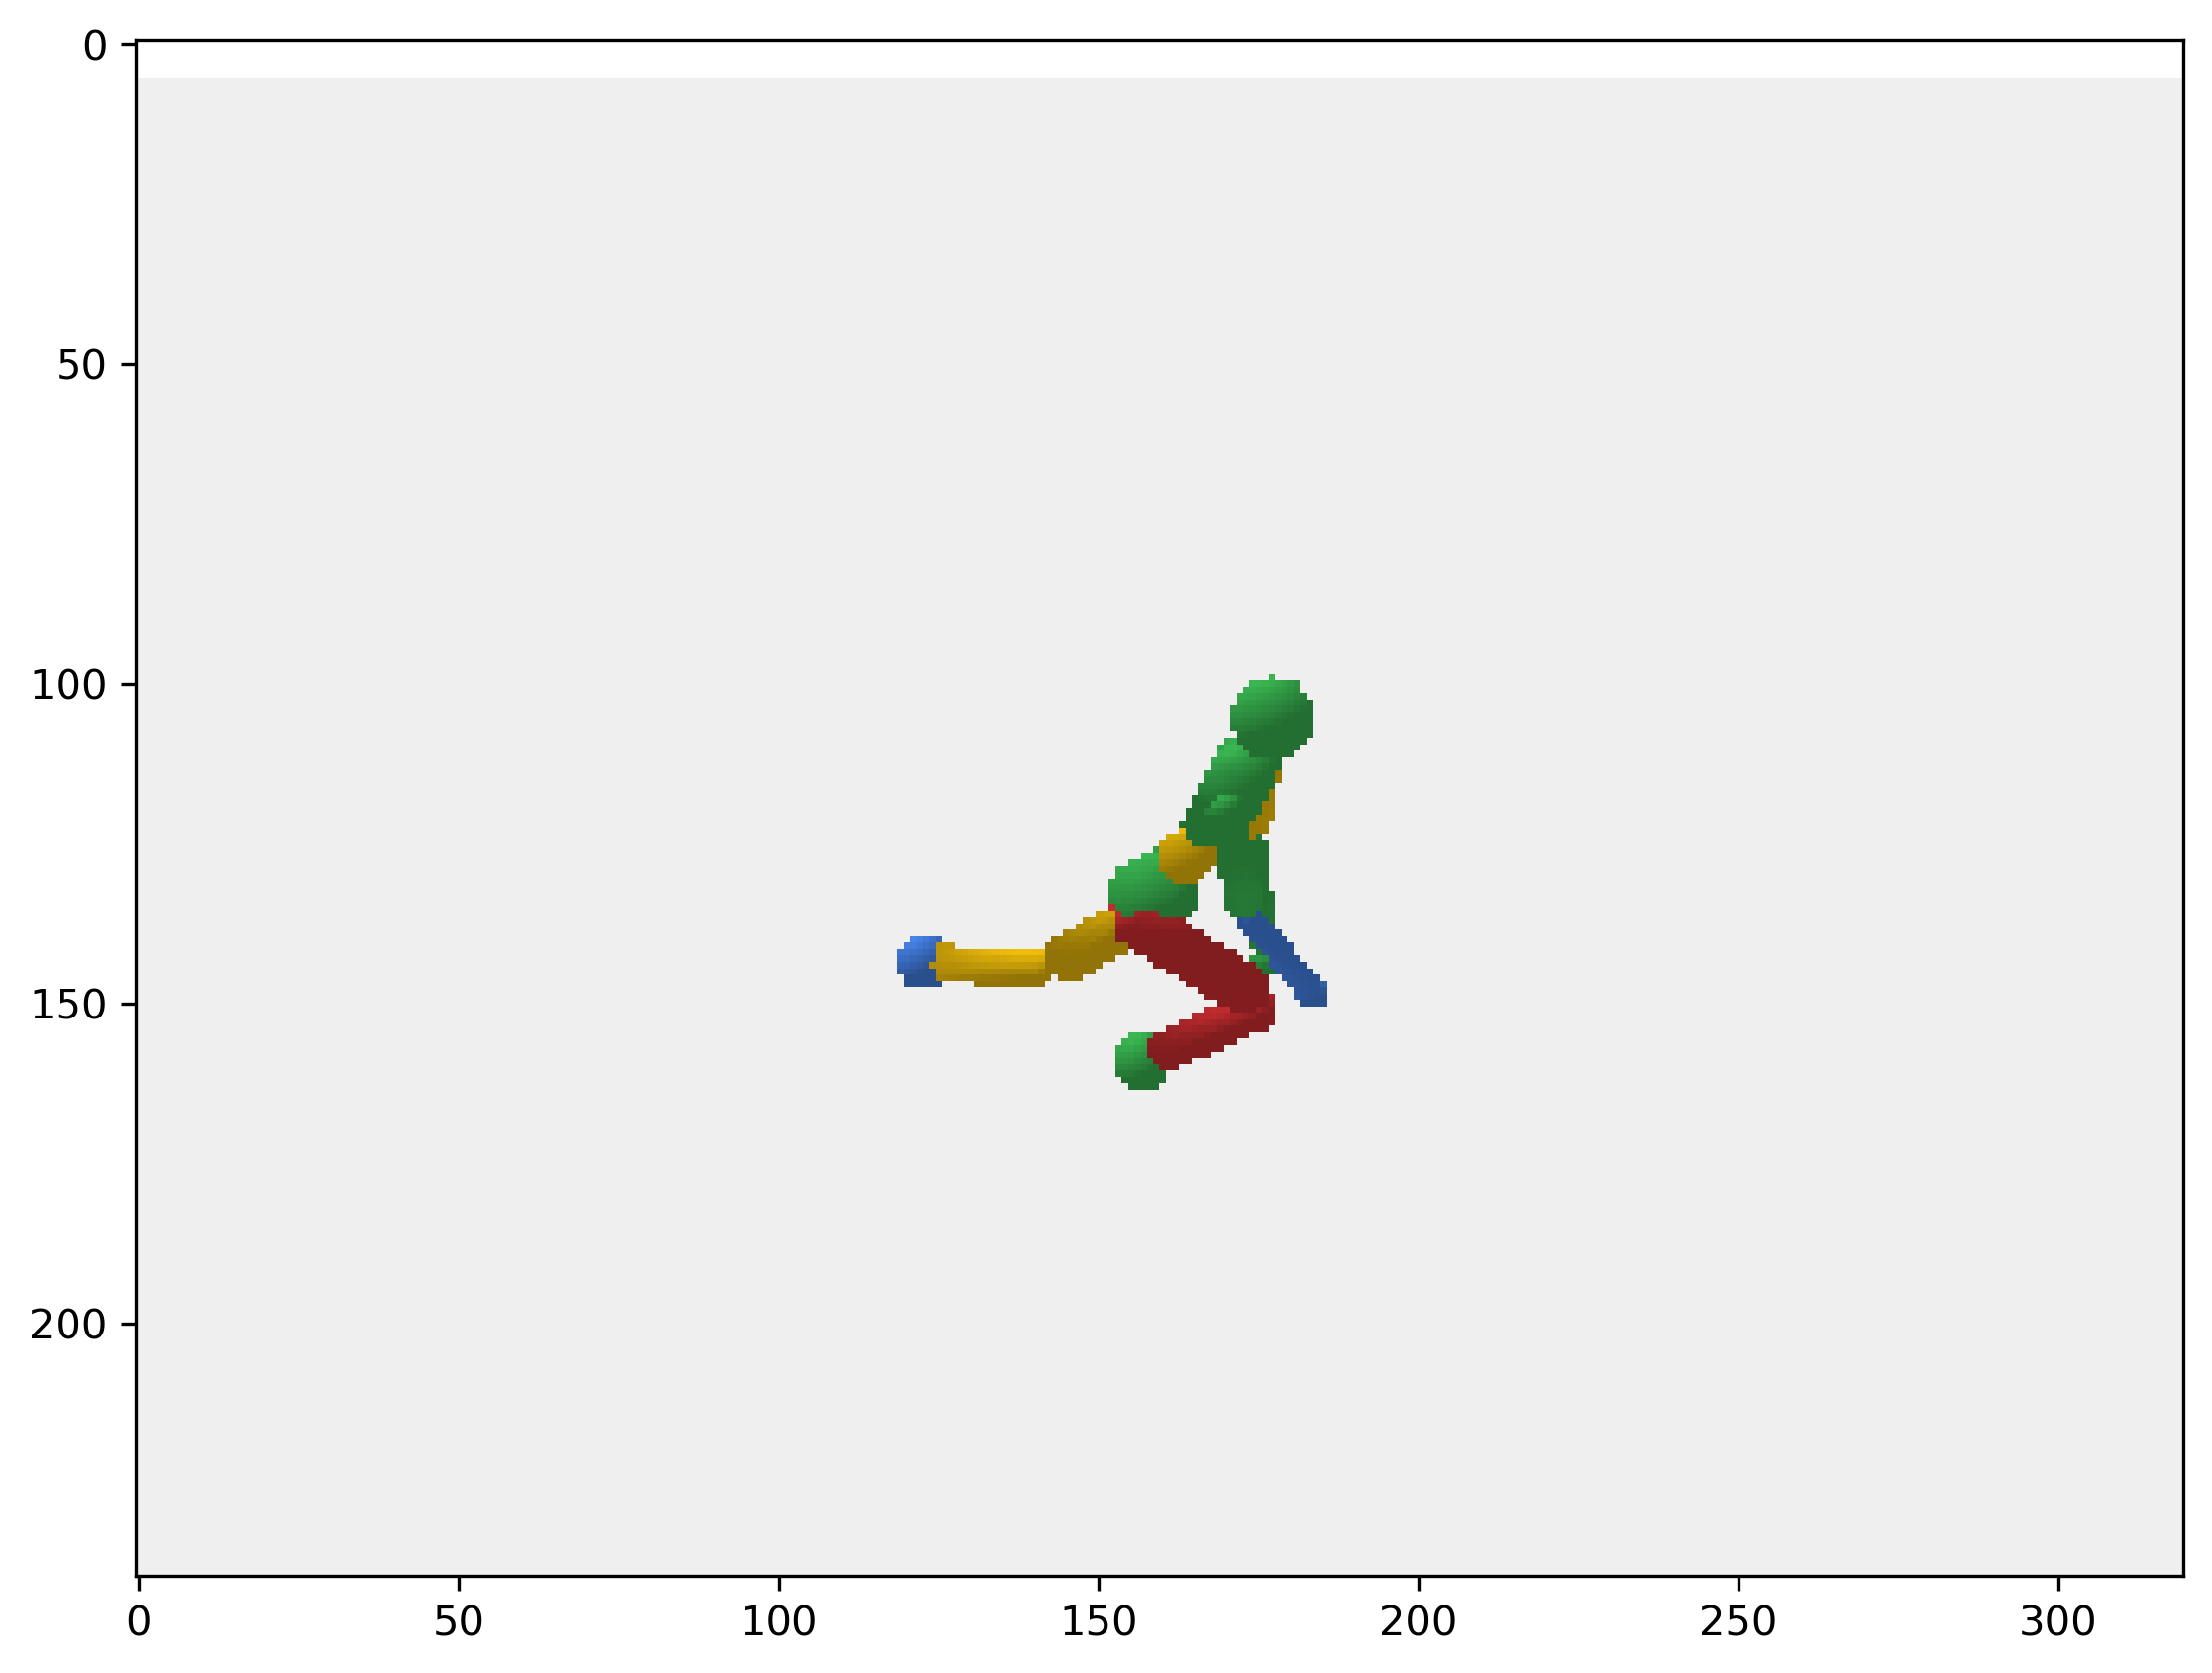

In [3]:
# IMPORTANT: You may need to restart the kernel to run this script
import gym
from utils.gym import gymplot
from utils.gym import gymbullet

env,agent = gymbullet.load_humanoid(trained=True)
obs = env.reset()
img = gymplot.plot_init(env)
for i in range(0, 30000):
    action = agent.act(obs)
    obs, r, done, _ = env.step(action)
    gymplot.plot_next(img,env)
    if done:
        break